In [1]:
import sys

sys.path.append("../src")

from nat2324.algorithms.gp import GeneticProgrammingAlgorithm
from nat2324.utils.gp.non_terminals import (
    Arithmetic,
    Comparison,
    Indexable,
    Logic,
    Flow,
)

from nat2324.utils import Symbol, Terminal, GPTree
from nat2324.problems import Sequence

%load_ext autoreload
%autoreload 2

In [69]:
NON_TERMINALS = Symbol.validate_ps([
    # Arithmetic.add(),
    # Indexable.get(),
    Indexable.push(),
    # Flow.before_after(),
    Flow.for_loop(),
])

TERMINALS = Symbol.validate_ps([
    #Terminal(-2),
    # Terminal(-1),
    # Terminal(0),
    # Terminal(1),
    # Terminal(2),
    # Terminal([]),
    Terminal("s"),
    Terminal("x"),
])

In [70]:
tree = GPTree.generate_tree(
    min_depth=2,
    max_depth=5,
    non_terminals=NON_TERMINALS,
    terminals=TERMINALS,
)

In [71]:
fibonacci_tree = GPTree(
    name="for",
    symbol=Flow.for_loop(),
    children=[
        GPTree(name="n", symbol=Terminal("n")),
        GPTree(name="push", symbol=Indexable.push(), children=[
            GPTree(name="s", symbol=Terminal("s")),
            GPTree(name="+", symbol=Arithmetic.add(), children=[
                GPTree(name="get", symbol=Indexable.get(), children=[
                    GPTree(name="s", symbol=Terminal("s")),
                    GPTree(name="-1", symbol=Terminal(-1)),
                ]),
                GPTree(name="get", symbol=Indexable.get(), children=[
                    GPTree(name="s", symbol=Terminal("s")),
                    GPTree(name="-2", symbol=Terminal(-2)),
                ]),
            ]),
        ]),
    ]
)

fibonacci_tree.show()
fibonacci_tree(s=[0, 1], n=9)

for
├── n
└── push
    ├── s
    └── +
        ├── get
        │   ├── s
        │   └── -1
        └── get
            ├── s
            └── -2


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [72]:
fibonacci = Sequence(
    sequence_type="fibonacci",
    num_samples=20,
    sample_range=(5, 35),
    train_frac=0.8,
    seed=0,
)

In [105]:
gp = GeneticProgrammingAlgorithm(
    fitness_fn=fibonacci.evaluate,
    min_depth=2,
    max_depth=2,
    N=1000,
    p_c=0.8,
    p_m=0.5,
    terminals=TERMINALS,
    non_terminals=NON_TERMINALS,
    tournament_size=2,
    seed=0,
)

In [106]:
solution, population, fitnesses = gp.run(max_generations=10, returnable=("solution", "population", "fitnesses"))

Current best N/A:   0%|          | 0/9 [00:00<?, ?it/s]

In [100]:
push_tree = GPTree(
    name="for",
    symbol=Flow.for_loop(),
    children=[
        GPTree(name="x", symbol=Terminal("x")),
        GPTree(name="push", symbol=Indexable.push(), children=[
            GPTree(name="s", symbol=Terminal("s")),
            GPTree(name="x", symbol=Terminal("x")),
        ]),
    ]
)

In [101]:
push_tree.show()

for
├── x
└── push
    ├── s
    └── x


In [116]:
push_tree(s=[], x=4)

[4, 4, 4, 4]

In [113]:
'/'.join([push_tree.name] + [d.name for d in push_tree.descendants])

'for/x/push/s/x'

In [104]:
push_tree.size
push_tree.height

2

In [114]:
any(['/'.join([p.name] + [d.name for d in p.descendants]) for p in population])

True

In [90]:
population[6](s=[], x=5)

5

In [62]:
solution(s=[], x=5)

[0, 1]

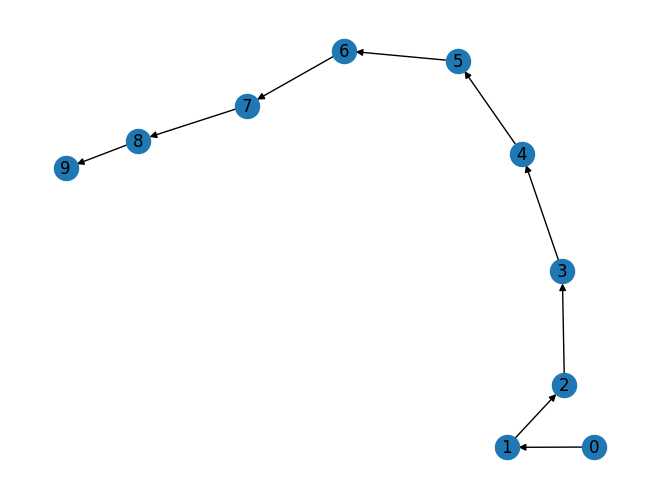

IndexError: list index out of range

In [57]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Define the function set
function_set = ['+', '-', '*', '/']

# Define the terminal set
terminal_set = ['x', 'y', 'z']

# Define the chromosome length
chromosome_length = 10

# Initialize a chromosome with random functions and terminals
chromosome = [random.choice(function_set + terminal_set) for _ in range(chromosome_length)]

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph based on the chromosome
for i, gene in enumerate(chromosome):
    G.add_node(i, function=gene)

# Add edges to the graph (you would need to define this based on your problem)
for i in range(len(chromosome)):
    if i < len(chromosome) - 1:
        G.add_edge(i, i+1)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

# Define a function to execute the graph
def execute_graph(G, inputs):
    # Initialize a dictionary to store the output of each node
    outputs = {}

    # Execute each node in topological order
    for node in nx.topological_sort(G):
        function = G.nodes[node]['function']
        if function in terminal_set:
            # If the node is a terminal, its output is its value in the inputs dictionary
            outputs[node] = inputs[function]
        else:
            # If the node is a function, its output is the result of applying its function to its inputs
            inputs = [outputs[edge[0]] for edge in G.in_edges(node)]
            if function == '+':
                outputs[node] = sum(inputs)
            elif function == '-':
                outputs[node] = inputs[0] - inputs[1]
            elif function == '*':
                outputs[node] = inputs[0] * inputs[1]
            elif function == '/':
                outputs[node] = inputs[0] / inputs[1]

    # The output of the graph is the output of the last node executed
    return outputs[node]

# Test the execute_graph function
inputs = {'x': 1, 'y': 2, 'z': 3}
print('Output:', execute_graph(G, inputs))


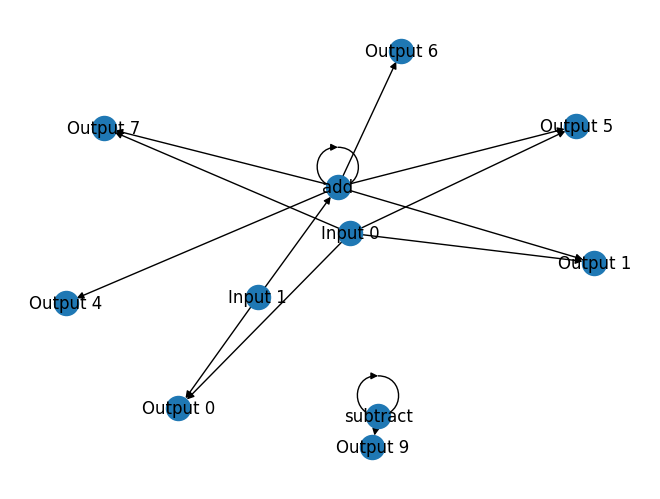

In [87]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, function, connections, parameters, output_flag):
        self.function = function
        self.connections = connections
        self.parameters = parameters
        self.output_flag = output_flag

class Individual:
    def __init__(self, num_inputs, num_nodes):
        self.num_inputs = num_inputs
        self.num_nodes = num_nodes
        self.nodes = [Node(None, None, None, None) for _ in range(num_nodes)]
        self.graph = nx.DiGraph()

    def initialize(self):
        for i in range(self.num_nodes):
            function_gene = np.random.randint(0, 2)
            connection_genes = np.random.randint(0, i + self.num_inputs, size=2)
            parameter_genes = np.random.rand(3)
            output_gene = np.random.randint(0, 2)

            self.nodes[i] = Node(function_gene, connection_genes, parameter_genes, output_gene)

    def print_graph(self):
        function_names = ['add', 'subtract', 'multiply', 'divide']
        
        for i in range(self.num_nodes):
            node = self.nodes[i]
            if node.output_flag:
                node_name = f'Output {i}'
            else:
                # Assuming function_gene is an index into a list of function names  # replace with your actual function names
                node_name = function_names[node.function]

            self.graph.add_node(node_name)

            for j in node.connections:
                if j < self.num_inputs:
                    connection_name = f'Input {j}'
                else:
                    connection_name = function_names[self.nodes[j - self.num_inputs].function]

                if not self.graph.has_node(connection_name):
                    self.graph.add_node(connection_name)

                self.graph.add_edge(connection_name, node_name)

        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True)
        plt.show()
    

    def shift_connections(self, P0, P1, P2):
        start_node = P0
        num_nodes = P1
        shift_value = P2

        for i in range(start_node, start_node + num_nodes):
            if i < self.num_nodes:
                self.nodes[i].connections = (self.nodes[i].connections + shift_value) % (i + self.num_inputs)

    def duplicate_and_scale_addresses(self, P0, P1, P2):
        start_node = P0
        num_nodes = P1
        scale_factor = P2

        if start_node + num_nodes > self.num_nodes:
            return

        new_nodes = []
        for i in range(start_node, start_node + num_nodes):
            function_gene = self.nodes[i].function
            connection_genes = (self.nodes[i].connections * scale_factor) % (i + self.num_inputs)
            parameter_genes = self.nodes[i].parameters
            output_gene = self.nodes[i].output_flag

            new_node = Node(function_gene, connection_genes, parameter_genes, output_gene)
            new_nodes.append(new_node)

        self.nodes = self.nodes[:start_node + num_nodes] + new_nodes + self.nodes[start_node + num_nodes:]
        self.num_nodes += len(new_nodes)

    # Numeric functions
    def add(self, input1, input2):
        return input1 + input2

    def subtract(self, input1, input2):
        return input1 - input2
    
    def mutate(self, mutation_rate):
        for i in range(self.num_nodes):
            if np.random.rand() < mutation_rate:
                self.nodes[i].function = np.random.randint(0, 2)
                self.nodes[i].connections = np.random.randint(0, i + self.num_inputs, size=2)
                self.nodes[i].parameters = np.random.rand(3)
                self.nodes[i].output_flag = np.random.randint(0, 2)
    
    def crossover(self, other):
        child1 = Individual(self.num_inputs, self.num_nodes)
        child2 = Individual(self.num_inputs, self.num_nodes)

        crossover_point = np.random.randint(0, self.num_nodes)

        child1.nodes[:crossover_point] = self.nodes[:crossover_point]
        child1.nodes[crossover_point:] = other.nodes[crossover_point:]

        child2.nodes[:crossover_point] = other.nodes[:crossover_point]
        child2.nodes[crossover_point:] = self.nodes[crossover_point:]

        return child1, child2
    

individual = Individual(num_inputs=2, num_nodes=10)
individual.initialize()
individual.print_graph()

